In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #for evaluation metrices


In [2]:
#import the data
store_sales=pd.read_csv('data.csv')
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2823 non-null   int64  
 1   ORDER NUMBER       2823 non-null   int64  
 2   QUANTITY ORDERED   2823 non-null   int64  
 3   PRICE EACH         2823 non-null   float64
 4   ORDER LINE NUMBER  2823 non-null   int64  
 5   SALES              2823 non-null   float64
 6   ORDER DATE         2823 non-null   object 
 7   STATUS             2823 non-null   object 
 8   QTR_ID             2823 non-null   int64  
 9   MONTH_ID           2823 non-null   int64  
 10  YEAR_ID            2823 non-null   int64  
 11  PRODUCTLINE        2823 non-null   object 
 12  MSRP               2823 non-null   int64  
 13  PRODUCTCODE        2823 non-null   object 
 14  CUSTOMER NAME      2823 non-null   object 
 15  CITY               2823 non-null   object 
 16  COUNTRY            2823 

In [3]:
store_sales=store_sales.drop('Unnamed: 0',axis=1)

In [4]:
store_sales.head()

,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMER NAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,AMER,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,EMEA,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,EMEA,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,AMER,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,AMER,Medium


In [5]:
store_sales=store_sales[['ORDER DATE','SALES']] # we just need the date and sales to predict values

In [6]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORDER DATE  2823 non-null   object 
 1   SALES       2823 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


In [7]:
store_sales['ORDER DATE']=pd.to_datetime(store_sales['ORDER DATE']) #converting date to datetime format

In [8]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ORDER DATE  2823 non-null   datetime64[ns]
 1   SALES       2823 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 44.2 KB


In [9]:
store_sales['ORDER DATE']

0      2003-02-24
1      2003-05-07
2      2003-07-01
3      2003-08-25
4      2003-10-10
          ...    
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDER DATE, Length: 2823, dtype: datetime64[ns]

In [10]:
#we will train the model to predict the sales in next month so we will convert the date to period of month 
#and then we gonna add the items sales in each month
store_sales['ORDER DATE']=store_sales['ORDER DATE'].dt.to_period('M')

In [11]:
store_sales['ORDER DATE']

0       2003-02
1       2003-05
2       2003-07
3       2003-08
4       2003-10
         ...   
2818    2004-12
2819    2005-01
2820    2005-03
2821    2005-03
2822    2005-05
Name: ORDER DATE, Length: 2823, dtype: period[M]

In [12]:
monthly_sales=store_sales.groupby('ORDER DATE').sum().reset_index()

In [13]:
monthly_sales.head(10)

,ORDER DATE,SALES
0,2003-01,129753.60
1,2003-02,140836.19
2,2003-03,174504.90
3,2003-04,201609.55
4,2003-05,192673.11
5,2003-06,168082.56
6,2003-07,187731.88
7,2003-08,197809.30
8,2003-09,263973.36
9,2003-10,568290.97


In [14]:
monthly_sales.shape

(29, 2)

In [15]:
#convert the resulting to timestamp datatype
monthly_sales['ORDER DATE']=monthly_sales['ORDER DATE'].dt.to_timestamp()

In [16]:
monthly_sales.head(10)

,ORDER DATE,SALES
0,2003-01-01,129753.60
1,2003-02-01,140836.19
2,2003-03-01,174504.90
3,2003-04-01,201609.55
4,2003-05-01,192673.11
5,2003-06-01,168082.56
6,2003-07-01,187731.88
7,2003-08-01,197809.30
8,2003-09-01,263973.36
9,2003-10-01,568290.97


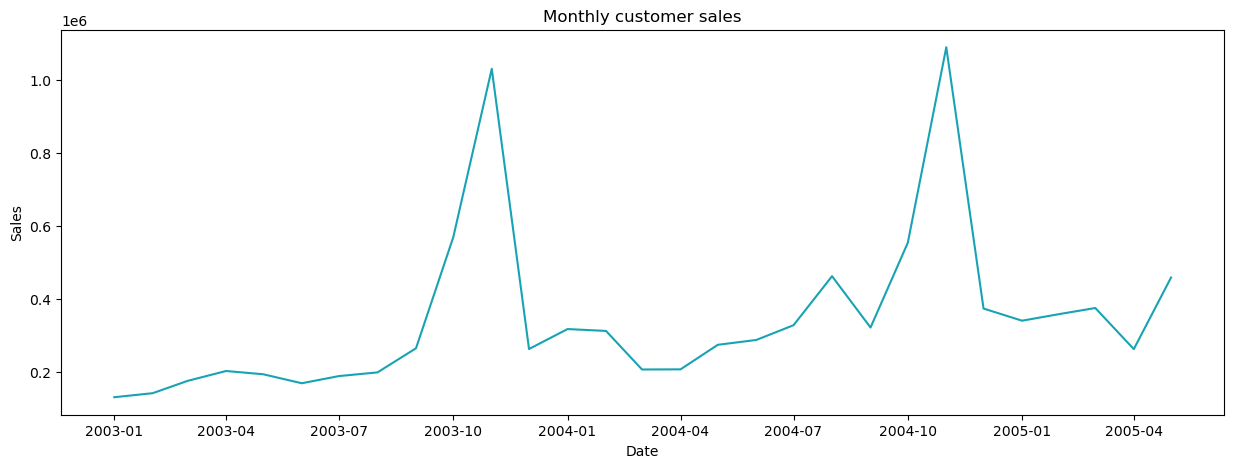

In [17]:
#visualize monthly sales for items
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['ORDER DATE'], monthly_sales['SALES'],color='#18a3b4')
plt.title('Monthly customer sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [18]:
#we need to make this data stationary to improve the training phase of the learning models
monthly_sales['sales_diff']=monthly_sales['SALES'].diff()#get the difference of every current and previous month to try to predict the next month

In [19]:
monthly_sales.isna().sum() #the first month(january 2003 as there is no date before it (data for december 2002))

ORDER DATE    0
SALES         0
sales_diff    1
dtype: int64

In [20]:
monthly_sales.loc[monthly_sales['sales_diff'].isna()]

,ORDER DATE,SALES,sales_diff
0,2003-01-01,129753.6,NaN


In [21]:
monthly_sales=monthly_sales.dropna()

In [22]:
monthly_sales.head()#the data will start from febuary-2003 so we see the increasing or decreasing of data between the current and previous month

,ORDER DATE,SALES,sales_diff
1,2003-02-01,140836.19,11082.59
2,2003-03-01,174504.90,33668.71
3,2003-04-01,201609.55,27104.65
4,2003-05-01,192673.11,-8936.44
5,2003-06-01,168082.56,-24590.55


In [23]:
monthly_sales.shape

(28, 3)

In [24]:
#now we will train our model to predict the sale in the next month by looking at the sale of items in specific numbers of previous months
#preparing the dataset to feed it to the ml model
#previous 12 month sale data will be used to predict the sales in the sucesses 12 month
#we will drop the order date and sales as we will deal with the stationary data and we are gonna to use it to train the ml model
supervised_data=pd.DataFrame(monthly_sales['sales_diff'])
supervised_data.head(10)

,sales_diff
1,11082.59
2,33668.71
3,27104.65
4,-8936.44
5,-24590.55
6,19649.32
7,10077.42
8,66164.06
9,304317.61
10,461546.69


In [25]:
#we will prepare the supervised data 
#(the previous 12 month sales will be act as input features and the next 12 month sale will be used as the output for supervised learning)
for i in range(1,13):
    col_name='month_'+str(i)
    supervised_data[col_name]=supervised_data['sales_diff'].shift(i)
supervised_data=supervised_data.dropna().reset_index(drop=True)


In [26]:
supervised_data.head(12)#sales from january to december(sales difference for each month)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65,33668.71,11082.59
1,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65,33668.71
2,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65
3,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55,-8936.44
4,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55
5,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32
6,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42
7,-140750.36,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06
8,232173.34,-140750.36,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61
9,536123.76,232173.34,-140750.36,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69


In [27]:
supervised_data.shape

(16, 13)

***Splitting the data into train and test***

In [29]:
train_data=supervised_data[:-4]  #for the previous 12 month
test_data=supervised_data[-4:]   #for the coming 12 month

In [30]:
train_data.shape

(12, 13)

In [31]:
train_data

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65,33668.71,11082.59
1,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65,33668.71
2,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55,-8936.44,27104.65
3,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55,-8936.44
4,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32,-24590.55
5,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42,19649.32
6,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06,10077.42
7,-140750.36,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61,66164.06
8,232173.34,-140750.36,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69,304317.61
9,536123.76,232173.34,-140750.36,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89,54700.96,-767961.20,461546.69


In [32]:
test_data.shape

(4, 13)

In [33]:
test_data

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
12,18642.76,-33259.24,-716245.35,536123.76,232173.34,-140750.36,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80,-5157.89
13,16076.58,18642.76,-33259.24,-716245.35,536123.76,232173.34,-140750.36,134357.18,40469.87,13235.83,67290.27,414.39,-105685.80
14,-112629.47,16076.58,18642.76,-33259.24,-716245.35,536123.76,232173.34,-140750.36,134357.18,40469.87,13235.83,67290.27,414.39
15,196227.77,-112629.47,16076.58,18642.76,-33259.24,-716245.35,536123.76,232173.34,-140750.36,134357.18,40469.87,13235.83,67290.27


In [34]:
#use min-max scalar to scale the feature values to restrict them from 1 to -1
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [35]:
#in the supervised data frame the first coloumn correspond to output and the remeaning coloumns act as input feature
# Splitting data into input and output
x_train, y_train = train_data[:, 1:], train_data[:, 0]#y is the output ,x is the input
x_test, y_test = test_data[:, 1:], test_data[:, 0]

In [36]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (12, 12)
y_train shape:  (12,)
x_test shape:  (4, 12)
y_test shape:  (4,)


In [37]:
#make prediction dataframe in order to merge all the predicted sale price of all the trained algorithms
monthly_sales['ORDER DATE'].shape

(28,)

In [54]:
sales_dates=monthly_sales['ORDER DATE'][-4:].reset_index(drop=True)
predict_df=pd.DataFrame(sales_dates)

In [80]:
predict_df.head()
predict_df.shape

(4, 2)

In [58]:
#extracting the actual monthly sales values of the last 5 month since they corresponds to test dataset 
#these values will be used to find the predicted sales prices from the predicted output for the monthly sales differences
act_sales=monthly_sales['SALES'][-4:].to_list()

In [60]:
act_sales # the sales for the last 13 month

[358186.18, 374262.76, 261633.29, 457861.06]

***Create the linear regression model***

In [62]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_pre=lr_model.predict(x_test) #fit x and y train inside the model

In [64]:
#transform the predicted value to their original scale
lr_pre=lr_pre.reshape(-1,1)
#Test set matrix contains the input features for the test data and the predicted output
lr_pre_test_set=np.concatenate((lr_pre,x_test),axis=1)
lr_pre_test_set=scaler.inverse_transform(lr_pre_test_set)

In [66]:
#calculate the predicted sales values 
result_list = []
for index in range(0,len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0] + act_sales[index])

lr_pre_series = pd.Series(result_list, name='Linear prediction') 
lr_pre_series


0    398682.075256
1    179291.116575
2    211677.455749
3    605110.412122
Name: Linear prediction, dtype: float64

In [68]:
# Merging with prediction DataFrame
predict_df = predict_df.merge(lr_pre_series ,left_index=True,right_index=True)
predict_df.shape

(4, 2)

In [70]:
predict_df

,ORDER DATE,Linear prediction
0,2005-02-01,398682.075256
1,2005-03-01,179291.116575
2,2005-04-01,211677.455749
3,2005-05-01,605110.412122


In [72]:
monthly_sales['SALES'].shape

(28,)

In [74]:
#comparing between the actual and predicted value to see the deviation
# Model Evaluation
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear prediction'],monthly_sales['SALES'][-4:]))
lr_mae = mean_absolute_error(predict_df['Linear prediction'], monthly_sales['SALES'][-4:])
lr_r2 = r2_score(predict_df['Linear prediction'], monthly_sales['SALES'][-4:])

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R2 Score: {lr_r2}")

Linear Regression MSE: 126324.79601078195
Linear Regression MAE: 108168.18126346264
Linear Regression R2 Score: 0.448389751205002


## Plotting actual sales vs predicted sales

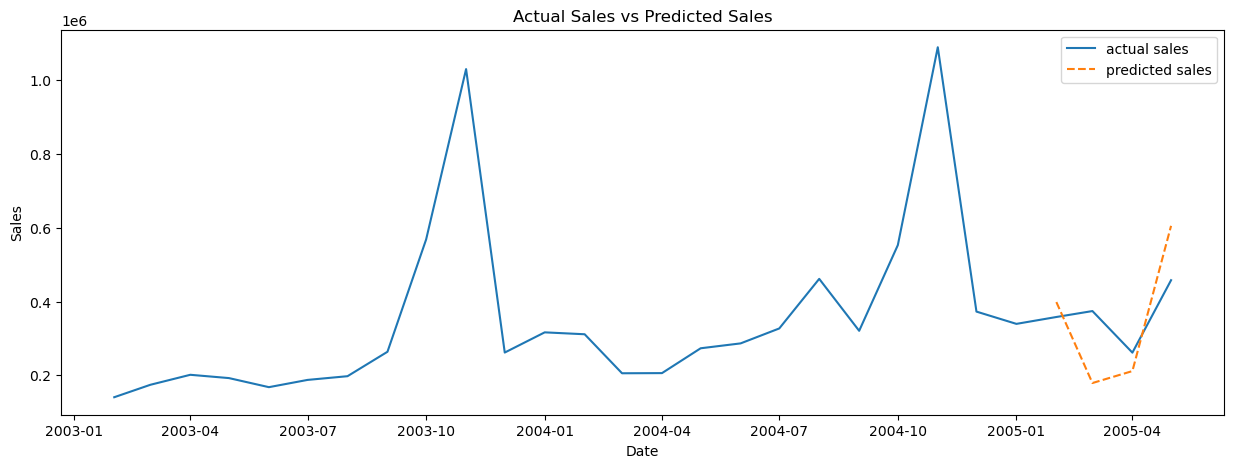

In [76]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['ORDER DATE'], monthly_sales['SALES'])
plt.plot(predict_df['ORDER DATE'], predict_df['Linear prediction'], linestyle='--')
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(['actual sales','predicted sales'])
plt.show()

In [ ]:
'''def create_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# Creating supervised data for the last 24 months
supervised_data = create_supervised(supervised_data['sales_diff'], 12)'''